This follows the work in 02-SimpleRegression_NumericValues_AutomobileMpg.ipynb

In [1]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# get the processed file
automobile_df = pd.read_csv('datasets/auto-mpg-processed.csv')

automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
77,28.0,4,112.0,88,2605,19.6,38
259,20.5,6,200.0,95,3155,18.2,42
107,44.3,4,90.0,48,2085,21.7,40
285,18.5,8,360.0,150,3940,13.0,41
115,18.0,8,307.0,130,3504,12.0,50


In [3]:
from sklearn.model_selection import train_test_split

X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [4]:
x_train.sample(5)

,horsepower
177,53
242,215
388,92
77,88
252,79


In [5]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [6]:
#R square- a measure of how well our linear modules captures the underlying variation in our training data
# The linear_model.score is the R-square

print('Training score: ', linear_model.score(x_train, y_train)) 

Training score:  0.6249929999698918


In [7]:
y_pred = linear_model.predict(x_test)

In [8]:
from sklearn.metrics import r2_score
print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.5394518653679893


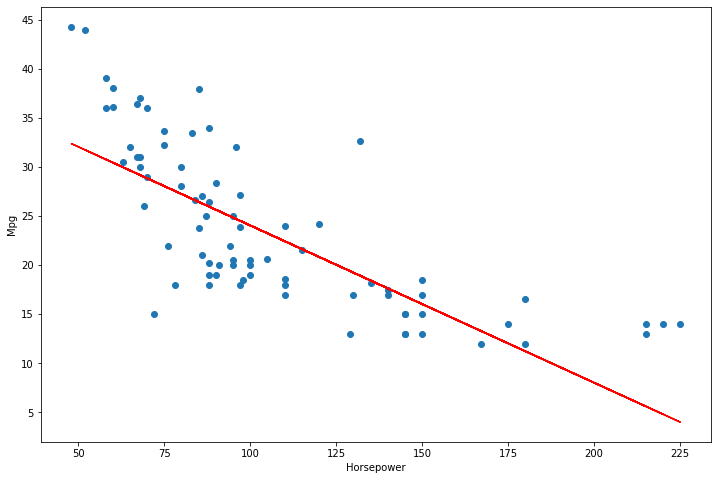

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

### Doing Linear regression model again but looking at the age vs mileage

In [10]:
X = automobile_df[['age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.3567540369751321
Testing score:  0.25735255514351996


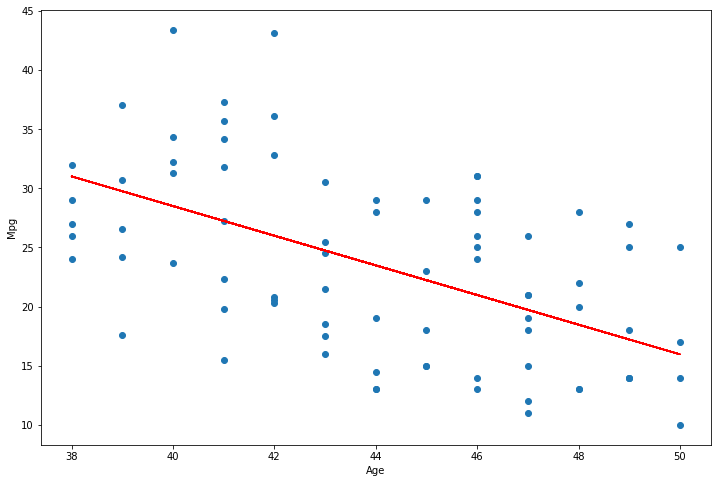

In [11]:
# plotting age vs mileage
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()


### Using more than one feature to train, instead of only one.


In [27]:
X = automobile_df[['displacement', 'horsepower', 'weight','acceleration','cylinders','age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [28]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [29]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.7893239675177732


In [30]:
# A linear mode assumes a linear relationship between your input features and the output you are trying to predict.
# This linear relationship can be represented as y = wx + B, where w is the weight(or model wieght or model parameter), 
# or the coefficients that you use to multiply your x variables, the features. 

predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

age            -0.773192
cylinders      -0.194518
weight         -0.007300
horsepower      0.001903
displacement    0.009395
acceleration    0.147235
dtype: float64


These coefficients are negative, showing that as the values of these features increase, the values of the mileage goes down

In [31]:
y_pred = linear_model.predict(x_test)

In [32]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.8869169343681331


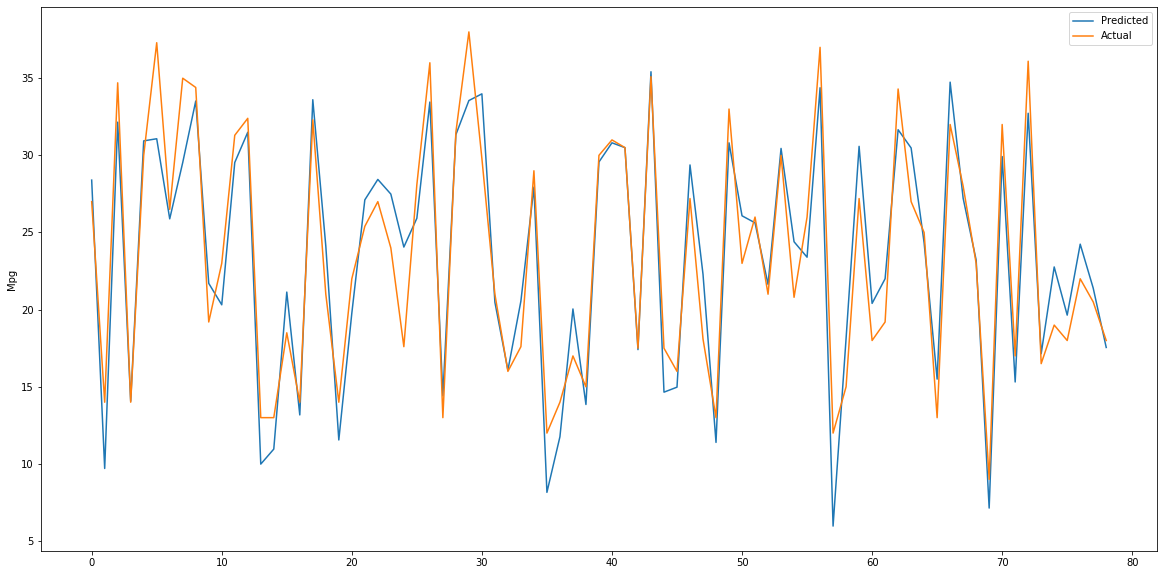

In [33]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Mpg')

plt.legend()
plt.show()